<a href="https://colab.research.google.com/github/sharat2000/SHARAT-RAJ/blob/main/Petrocoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('/content/drive/MyDrive/Petrocoder Data/tech_challenge2021_train.csv')


In [3]:
test_data=pd.read_csv('/content/drive/MyDrive/Petrocoder Data/tech_challenge2021_test.csv')

In [4]:
train_data

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,USROP_A 0 N-NA_F-9_Ad,491.033,5.842270,9440.922214,0.244047,42.864024,84.0,2784.321942,1.21,311.15,93.780222,490.760309,150.880
1,USROP_A 0 N-NA_F-9_Ad,491.185,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.880
2,USROP_A 0 N-NA_F-9_Ad,491.222,6.241431,9499.941336,0.244047,42.315384,84.0,2784.321942,1.21,311.15,93.979803,490.910880,150.880
3,USROP_A 0 N-NA_F-9_Ad,491.338,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.260
4,USROP_A 0 N-NA_F-9_Ad,491.341,6.368437,9313.024466,0.216931,42.894504,84.0,2784.321942,1.21,311.15,94.079593,491.061756,146.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198923,USROP_A 6 N-SH_F-9d,633.374,8.014969,10348.000340,6.550000,38.529999,143.0,3434.469970,1.03,444.50,99.075631,633.068076,84.578
198924,USROP_A 6 N-SH_F-9d,633.420,8.014969,10348.000340,6.550000,38.529999,143.0,3434.469970,1.03,444.50,99.075631,633.208589,84.578
198925,USROP_A 6 N-SH_F-9d,633.478,8.014969,10348.000340,6.550000,38.529999,143.0,3434.469970,1.03,444.50,99.075631,633.266196,84.578
198926,USROP_A 6 N-SH_F-9d,633.527,8.014969,10348.000340,6.550000,38.529999,143.0,3434.469970,1.03,444.50,99.075631,633.219562,82.161


In [5]:
train_data.nunique()

Well Identifier                        7
Measured Depth m                  170275
Weight on Bit kkgf                 12162
Average Standpipe Pressure kPa     31849
Average Surface Torque kN.m        10946
Rate of Penetration m/h            13540
Average Rotary Speed rpm            5560
Mud Flow In L/min                   3798
Mud Density In g/cm3                  51
Diameter mm                            3
Average Hookload kkgf              15752
Hole Depth (TVD) m                142094
USROP Gamma gAPI                    1933
dtype: int64

In [6]:
train_data.isnull().sum()

Well Identifier                   0
Measured Depth m                  0
Weight on Bit kkgf                0
Average Standpipe Pressure kPa    0
Average Surface Torque kN.m       0
Rate of Penetration m/h           0
Average Rotary Speed rpm          0
Mud Flow In L/min                 0
Mud Density In g/cm3              0
Diameter mm                       0
Average Hookload kkgf             0
Hole Depth (TVD) m                0
USROP Gamma gAPI                  0
dtype: int64

In [7]:
train_data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [8]:
train_data['Well Identifier'].value_counts()

USROP_A 3 N-SH-F-15d     53041
USROP_A 4 N-SH_F-15Sd    51708
USROP_A 2 N-SH_F-14d     47645
USROP_A 5 N-SH-F-5d      18548
USROP_A 0 N-NA_F-9_Ad    13746
USROP_A 6 N-SH_F-9d       7851
USROP_A 1 N-S_F-7d        6389
Name: Well Identifier, dtype: int64

In [9]:
A= train_data.groupby(['Well Identifier'])
A.first()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
Well Identifier,,,,,,,,,,,,
USROP_A 0 N-NA_F-9_Ad,491.033,5.842270,9440.922214,0.244047,42.864024,84.000000,2784.321942,1.210000,311.15,93.780222,490.760309,150.880
USROP_A 1 N-S_F-7d,301.231,3.834133,13463.000490,4.159999,64.580002,208.000000,4260.669920,1.030000,444.50,95.129326,301.220124,43.497
USROP_A 2 N-SH_F-14d,987.948,6.179480,16538.999940,13.479999,12.790000,179.850006,1883.349976,1.360000,444.50,140.914586,987.459950,19.015
USROP_A 3 N-SH-F-15d,1306.525,0.390089,5922.527567,6.521484,70.420992,30.000000,1993.927917,11.850475,444.50,121.871198,1283.159232,62.090
USROP_A 4 N-SH_F-15Sd,1400.550,5.822580,16523.354800,12.148129,19.961352,99.930000,3544.773359,1.430000,311.15,119.735076,1367.018856,126.460
USROP_A 5 N-SH-F-5d,2828.239,14.847068,19732.000730,15.600001,4.690000,99.180000,2774.260011,1.380000,215.90,136.947890,2530.261538,19.070
USROP_A 6 N-SH_F-9d,225.171,0.560844,8883.999635,1.440001,3.350000,144.000000,3478.899903,1.030000,444.50,95.547406,225.162770,16.916


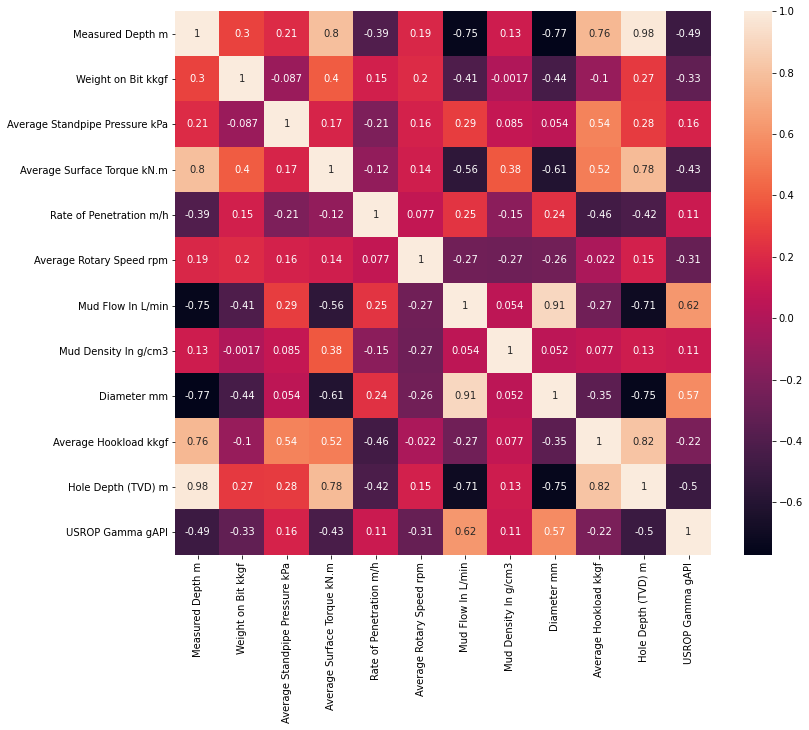

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [11]:
train_data=train_data.drop_duplicates()

In [12]:
train_data=train_data.drop(['Well Identifier'],axis=1)

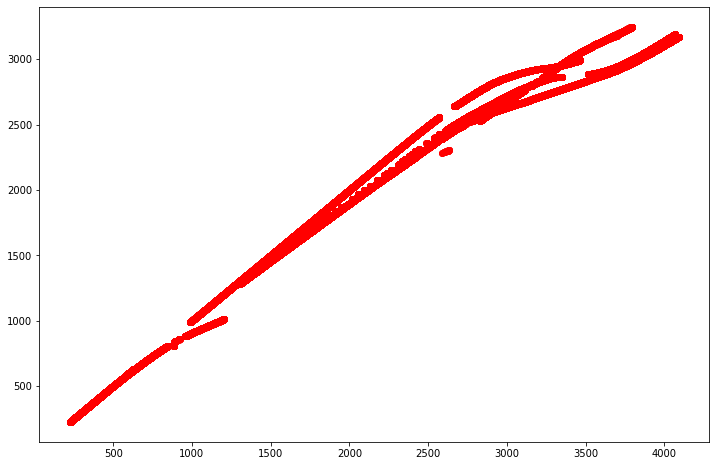

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(train_data['Measured Depth m'],train_data['Hole Depth (TVD) m'],c='r')

In [14]:
X=train_data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


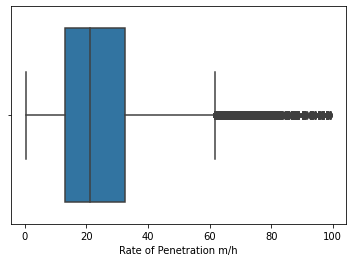

In [15]:
sns.boxplot(X['Rate of Penetration m/h'])

In [16]:
y1=X['Rate of Penetration m/h'].quantile(.75)+(X['Rate of Penetration m/h'].quantile(.75)-X['Rate of Penetration m/h'].quantile(.25))*1.5
print(y1)
for i in X['Rate of Penetration m/h']:
  if i>y1:
    X['Rate of Penetration m/h'].replace(i,y1,inplace=True)

X=X[X['Rate of Penetration m/h']<y1]

61.690003319999995


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


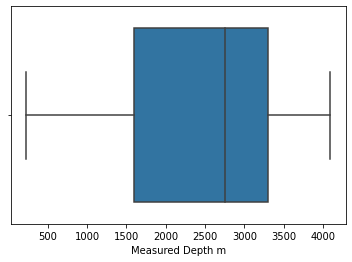

In [17]:
sns.boxplot(X['Measured Depth m'])

In [18]:
X=X.drop(['Measured Depth m'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


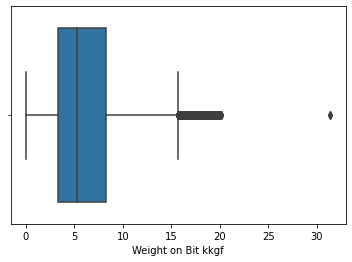

In [19]:
sns.boxplot(X['Weight on Bit kkgf'])

In [20]:

a1=X['Weight on Bit kkgf'].quantile(.75)+(X['Weight on Bit kkgf'].quantile(.75)-X['Weight on Bit kkgf'].quantile(.25))*1.5
print(a1)

15.726047468500001


In [21]:
X=X[X['Weight on Bit kkgf']<a1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


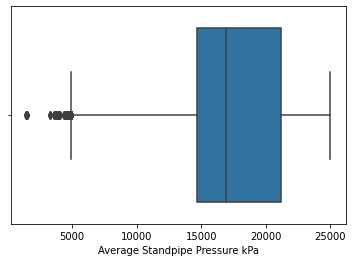

In [22]:
sns.boxplot(X['Average Standpipe Pressure kPa'])

In [23]:
a2=X['Average Standpipe Pressure kPa'].quantile(.25)-(X['Average Standpipe Pressure kPa'].quantile(.75)-X['Average Standpipe Pressure kPa'].quantile(.25))*1.5
a2

4950.045229999994

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


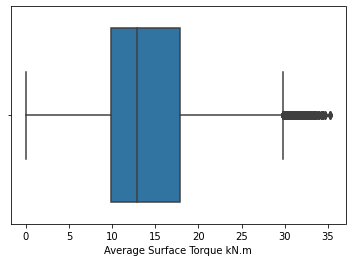

In [24]:
sns.boxplot(X['Average Surface Torque kN.m'])

In [25]:
a3=X['Average Surface Torque kN.m'].quantile(.75)+(X['Average Surface Torque kN.m'].quantile(.75)-X['Average Surface Torque kN.m'].quantile(.25))*1.5
a3

29.748189395999997

In [26]:
X=X.drop(['Average Surface Torque kN.m'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


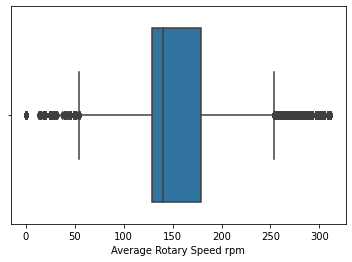

In [27]:
sns.boxplot(X['Average Rotary Speed rpm'])

In [28]:
a5=X['Average Rotary Speed rpm'].quantile(.75)+(X['Average Rotary Speed rpm'].quantile(.75)-X['Average Rotary Speed rpm'].quantile(.25))*1.5
print(a5)
a6=X['Average Rotary Speed rpm'].quantile(.25)-(X['Average Rotary Speed rpm'].quantile(.75)-X['Average Rotary Speed rpm'].quantile(.25))*1.5
print(a6)

253.745
54.42499999999997


In [29]:
X=X.drop(['Average Rotary Speed rpm'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


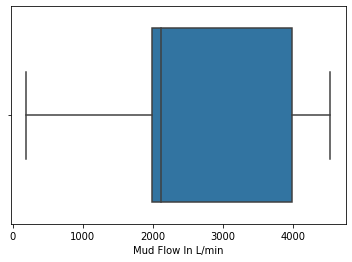

In [30]:
sns.boxplot(X['Mud Flow In L/min'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


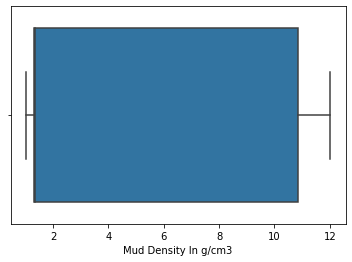

In [31]:
sns.boxplot(X['Mud Density In g/cm3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


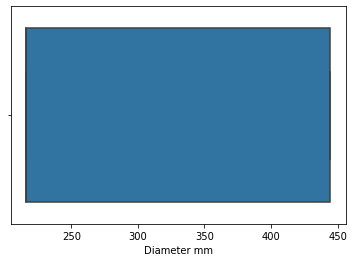

In [32]:
sns.boxplot(X['Diameter mm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


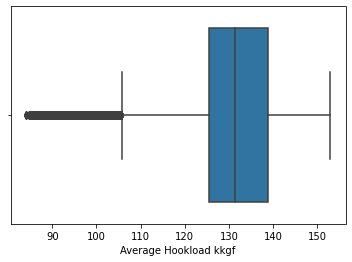

In [33]:
sns.boxplot(X['Average Hookload kkgf'])

In [34]:
a8=X['Average Hookload kkgf'].quantile(.25)-(X['Average Hookload kkgf'].quantile(.75)-X['Average Hookload kkgf'].quantile(.25))*1.5
print(a8)

105.50804629999999


In [35]:
X=X[X['Average Hookload kkgf']>a8]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


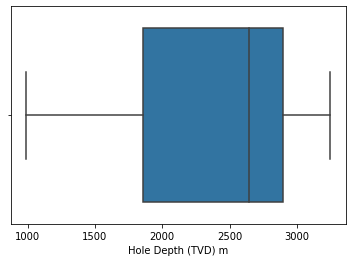

In [36]:
sns.boxplot(X['Hole Depth (TVD) m'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


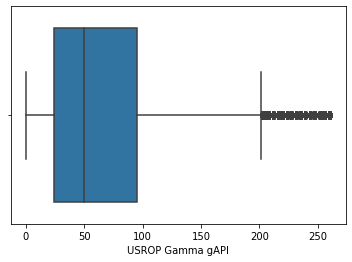

In [37]:
sns.boxplot(X['USROP Gamma gAPI'])

In [38]:
X['USROP Gamma gAPI']=np.sqrt(X['USROP Gamma gAPI'])

In [39]:
X

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Rate of Penetration m/h,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
20135,6.179480,16538.99994,12.79,1883.349976,1.36,444.5,140.914586,987.459950,4.360619
20136,6.179480,16538.99994,12.79,1883.349976,1.36,444.5,140.914586,987.612350,4.360619
20137,6.179480,16538.99994,12.79,1883.349976,1.36,444.5,140.914586,987.917150,4.360619
20138,6.179480,16538.99994,12.79,1883.349976,1.36,444.5,140.914586,988.069550,4.360619
20139,6.179480,16538.99994,12.79,1883.349976,1.36,444.5,140.914586,988.374350,4.360619
...,...,...,...,...,...,...,...,...,...
191072,5.292327,21008.00018,7.68,2088.929932,1.46,215.9,145.727648,3246.482712,7.525955
191073,5.292327,21008.00018,7.68,2088.929932,1.46,215.9,145.727648,3246.491856,7.525955
191074,5.292327,21008.00018,7.68,2088.929932,1.46,215.9,145.727648,3246.513192,7.525955
191075,5.292327,21008.00018,7.68,2088.929932,1.46,215.9,145.727648,3246.524165,7.525955


In [40]:
Y=X['Rate of Penetration m/h']
X=X.drop(['Rate of Penetration m/h'],axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
XX=scaler.fit_transform(X)

In [42]:
X=pd.DataFrame(data=XX,columns=X.columns)
X

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,0.102202,-0.539029,-0.855881,-0.672403,1.639367,0.907174,-2.441949,-0.950423
1,0.102202,-0.539029,-0.855881,-0.672403,1.639367,0.907174,-2.441689,-0.950423
2,0.102202,-0.539029,-0.855881,-0.672403,1.639367,0.907174,-2.441171,-0.950423
3,0.102202,-0.539029,-0.855881,-0.672403,1.639367,0.907174,-2.440911,-0.950423
4,0.102202,-0.539029,-0.855881,-0.672403,1.639367,0.907174,-2.440392,-0.950423
...,...,...,...,...,...,...,...,...
164207,-0.138282,0.694825,-0.663295,-0.651102,-0.722281,1.485013,1.403301,0.063307
164208,-0.138282,0.694825,-0.663295,-0.651102,-0.722281,1.485013,1.403316,0.063307
164209,-0.138282,0.694825,-0.663295,-0.651102,-0.722281,1.485013,1.403353,0.063307
164210,-0.138282,0.694825,-0.663295,-0.651102,-0.722281,1.485013,1.403371,0.063307


In [43]:
Y

20135     12.79
20136     12.79
20137     12.79
20138     12.79
20139     12.79
          ...  
191072     7.68
191073     7.68
191074     7.68
191075     7.68
191076     7.68
Name: Rate of Penetration m/h, Length: 164212, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,random_state=42,test_size=.20)

In [45]:
test_data['Well Identifier'].value_counts()

TC-2021-TW    114299
Name: Well Identifier, dtype: int64

In [46]:
test_data=test_data.drop(['Well Identifier'],axis=1)

In [47]:
test_data.nunique()

Measured Depth m                  114296
Weight on Bit kkgf                  6616
Average Standpipe Pressure kPa     14367
Average Surface Torque kN.m         4217
Average Rotary Speed rpm            4916
Mud Flow In L/min                    905
Mud Density In g/cm3                  21
Diameter mm                            4
Average Hookload kkgf               9062
Hole Depth (TVD) m                 48489
USROP Gamma gAPI                    2939
dtype: int64

In [48]:
test_data.isnull().sum()

Measured Depth m                  0
Weight on Bit kkgf                0
Average Standpipe Pressure kPa    0
Average Surface Torque kN.m       0
Average Rotary Speed rpm          0
Mud Flow In L/min                 0
Mud Density In g/cm3              0
Diameter mm                       0
Average Hookload kkgf             0
Hole Depth (TVD) m                0
USROP Gamma gAPI                  0
dtype: int64

In [49]:
test_data=test_data.drop(['Measured Depth m','Average Surface Torque kN.m','Average Rotary Speed rpm'],axis=1)

In [50]:
test_data

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,10.656246,23053.9448,3491.436904,1.31,254.0,136.662392,365.124187,20.774
1,10.656246,23053.9448,3491.436904,1.31,254.0,136.662392,365.276587,20.774
2,10.656246,23053.9448,3491.436904,1.31,254.0,136.662392,365.428682,20.774
3,10.656246,23053.9448,3491.436904,1.31,254.0,136.662392,365.581082,20.774
4,10.656246,23053.9448,3491.436904,1.31,254.0,136.662392,365.733178,20.774
...,...,...,...,...,...,...,...,...
114294,1.238761,23439.5410,2304.100791,1.48,254.0,140.390921,3005.314284,53.970
114295,1.238761,23439.5410,2304.100791,1.48,254.0,140.390921,3005.335010,53.970
114296,0.943019,23458.0879,2304.100791,1.48,254.0,140.475743,3005.383778,53.970
114297,0.943019,23458.0879,2304.100791,1.48,254.0,140.475743,3005.409077,53.970


In [51]:
test_data.describe()

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000,114299.000000
mean,7.212731,20166.997780,2961.677990,1.323607,279.878560,132.792489,2454.737342,37.111566
std,4.305159,3291.618973,797.950250,0.096742,84.492569,13.102548,424.176104,49.309222
min,0.002268,4852.943868,969.784700,0.990000,215.900000,91.244641,365.124187,0.000000
25%,4.462442,18600.696910,2364.512181,1.300000,215.900000,129.087853,2487.765713,4.746000
50%,6.949489,20618.702740,2496.971318,1.310000,215.900000,131.744997,2652.929822,8.173000
75%,9.226069,22834.815625,3491.436904,1.320000,311.150000,136.535839,2672.868619,53.410000
max,24.348838,24999.907310,4490.558547,1.520000,444.500000,161.973753,3005.423402,470.460000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


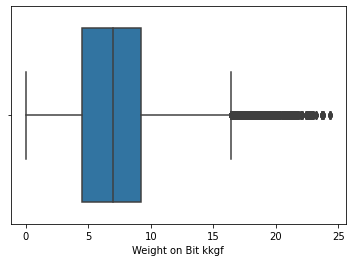

In [52]:
sns.boxplot(test_data['Weight on Bit kkgf'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


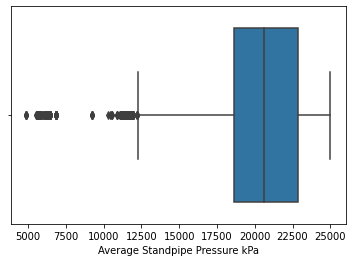

In [53]:
sns.boxplot(test_data['Average Standpipe Pressure kPa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


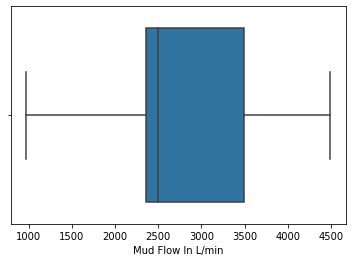

In [54]:
sns.boxplot(test_data['Mud Flow In L/min'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


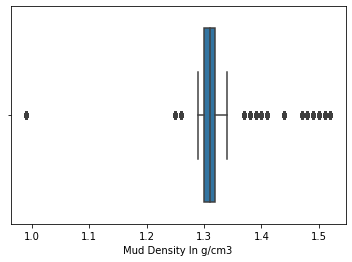

In [55]:
sns.boxplot(test_data['Mud Density In g/cm3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


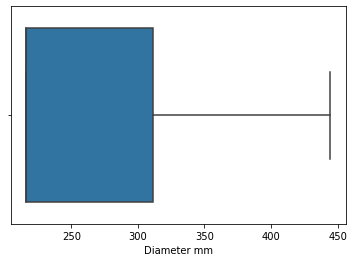

In [56]:
sns.boxplot(test_data['Diameter mm'])

In [57]:
test_data_scaled=scaler.fit_transform(test_data)
test_data=pd.DataFrame(data=test_data_scaled,columns=test_data.columns)


In [58]:
test_data

,Weight on Bit kkgf,Average Standpipe Pressure kPa,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,0.799861,0.877064,0.663903,-0.140658,-0.306283,0.295356,-4.926308,-0.331330
1,0.799861,0.877064,0.663903,-0.140658,-0.306283,0.295356,-4.925949,-0.331330
2,0.799861,0.877064,0.663903,-0.140658,-0.306283,0.295356,-4.925591,-0.331330
3,0.799861,0.877064,0.663903,-0.140658,-0.306283,0.295356,-4.925231,-0.331330
4,0.799861,0.877064,0.663903,-0.140658,-0.306283,0.295356,-4.924873,-0.331330
...,...,...,...,...,...,...,...,...
114294,-1.387636,0.994209,-0.824087,1.616600,-0.306283,0.579923,1.297997,0.341894
114295,-1.387636,0.994209,-0.824087,1.616600,-0.306283,0.579923,1.298046,0.341894
114296,-1.456332,0.999844,-0.824087,1.616600,-0.306283,0.586396,1.298161,0.341894
114297,-1.456332,0.999844,-0.824087,1.616600,-0.306283,0.586396,1.298221,0.341894


In [59]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [60]:
import tensorflow as tf
tf.random.set_seed(1)

In [61]:
X_train.shape

(131369, 8)

In [62]:
input_neurons=X_train.shape[1]
output_neurons=1
NHL_1=4
NHL_2=3

In [63]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=NHL_1,activation='relu'))
model.add(Dense(units=NHL_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [66]:
model_history=model.fit(X_train,Y_train,batch_size=64,epochs=10)

Epoch 1/10
2053/2053 [==============================] - 5s 2ms/step - loss: 13.2650
Epoch 2/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.7510
Epoch 3/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.5114
Epoch 4/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.4250
Epoch 5/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.4035
Epoch 6/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.3844
Epoch 7/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.3622
Epoch 8/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.3978
Epoch 9/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.3316
Epoch 10/10
2053/2053 [==============================] - 5s 2ms/step - loss: 6.3299


In [67]:
from sklearn.metrics import mean_absolute_error as MAE

In [68]:
pred_val=model.predict(X_val)
pred_train=model.predict(X_train)
Pred=model.predict(test_data)
print(MAE(Y_val,pred_val))
print(MAE(Y_train,pred_train))

6.250717519383284
6.3181770038567215


In [69]:
Pred=Pred.flatten()
Pred

array([13.511932, 13.510614, 13.509299, ..., 33.512177, 33.512436,
       33.512585], dtype=float32)

In [70]:
Pred.shape

(114299,)

In [71]:
result=pd.DataFrame({'Rate of Penetration m/h':Pred})

In [72]:
result.describe()

,Rate of Penetration m/h
count,114299.000000
mean,17.300779
std,8.053441
min,1.832496
25%,10.711953
50%,14.241950
75%,22.074074
max,53.053829


In [73]:
result.value_counts()

Rate of Penetration m/h
10.542822                  1087
9.754959                     23
9.948078                     21
22.154722                    21
20.875622                    21
                           ... 
11.025632                     1
11.025634                     1
22.576611                     1
22.565079                     1
1.832496                      1
Length: 41905, dtype: int64

In [74]:
result[result['Rate of Penetration m/h']<0].count

<bound method DataFrame.count of Empty DataFrame
Columns: [Rate of Penetration m/h]
Index: []>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


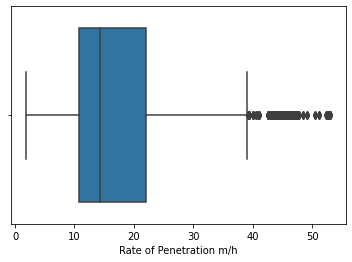

In [75]:
sns.boxplot(result['Rate of Penetration m/h'])

In [76]:
y1=result['Rate of Penetration m/h'].quantile(.75)+(result['Rate of Penetration m/h'].quantile(.75)-result['Rate of Penetration m/h'].quantile(.25))*1.5
print(y1)

39.11725473403931


In [77]:
result[result['Rate of Penetration m/h']>y1].count

<bound method DataFrame.count of         Rate of Penetration m/h
19333                 40.483265
19334                 40.483265
19335                 40.483265
19336                 40.483265
19337                 40.483265
...                         ...
114158                52.969074
114159                52.969074
114160                52.969074
114161                52.969074
114162                52.969074

[4376 rows x 1 columns]>

In [78]:
result.to_csv('SHARAT_PCTC_21_finalsubmission.csv',index=False)